dataset link ----> https://www.kaggle.com/datasets/amisha0528/apple-quality

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving apple_quality.csv to apple_quality.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("apple_quality.csv")
data.sample(5)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
776,776.0,1.147448,1.961559,-1.586545,2.511214,-1.274646,-0.784790,1.330072744,good
2769,2769.0,-1.104891,-1.306335,0.844942,0.694253,2.205707,1.345145,-0.358597278,good
3050,3050.0,0.520275,-1.824736,-1.002358,-0.815311,-0.104198,0.148184,0.125661579,good
2972,2972.0,1.485462,-3.121955,1.255660,2.124263,1.272228,2.936912,1.059464845,good
3236,3236.0,0.130441,-1.375330,-0.126782,0.082599,1.076072,-0.669545,1.41772588,bad


In [ ]:
data.shape

(4001, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [ ]:
data.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [ ]:
data=data.drop(["A_id"],axis=1)

In [ ]:
data.shape[1]

8

In [ ]:
data.isnull().sum()

,0
Size,1
Weight,1
Sweetness,1
Crunchiness,1
Juiciness,1
Ripeness,1
Acidity,0
Quality,1


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.duplicated().any()

False

In [ ]:
data["Quality"].unique()

array(['good', 'bad'], dtype=object)

In [ ]:
data["Quality"].value_counts()

,count
Quality,
good,2004
bad,1996


In [ ]:
data["Quality"].replace({"good":1,"bad":0},inplace=True)

In [ ]:
data.sample(2)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
2603,0.555371,-1.114110,-1.171770,-0.998496,5.464513,-1.226260,2.652943776,0
2721,1.818082,-2.793261,0.379521,-2.346183,3.880828,-0.588183,2.755812939,1


In [ ]:
data["Quality"].unique()

array([1, 0])

In [ ]:
data["Acidity"]=data["Acidity"].astype("float64")

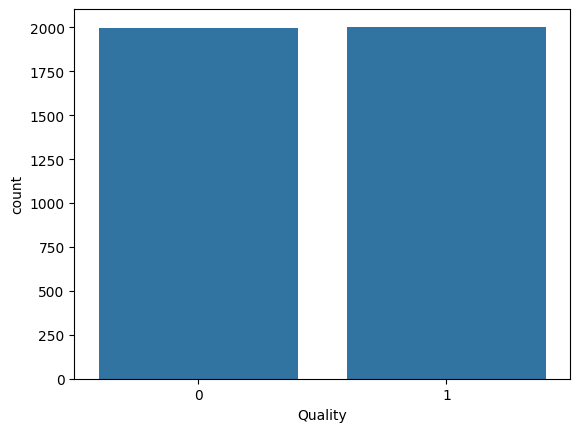

In [ ]:
sns.countplot(x=data['Quality'])
plt.show()

<ipython-input-19-47c859930ba2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])
<ipython-input-19-47c859930ba2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])
<ipython-input-19-47c859930ba2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn

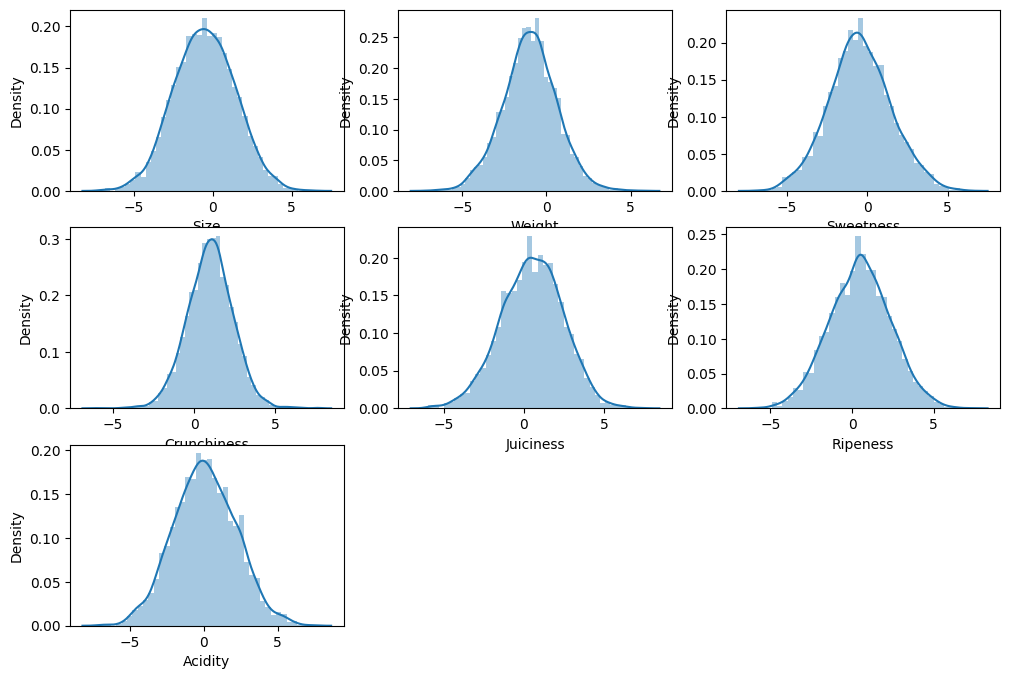

In [ ]:
dist_iter=1
plt.figure(figsize=(12,8))
for i in data.columns[:-1]:
  plt.subplot(3,3,dist_iter)
  sns.distplot(data[i])
  dist_iter+=1
plt.show()


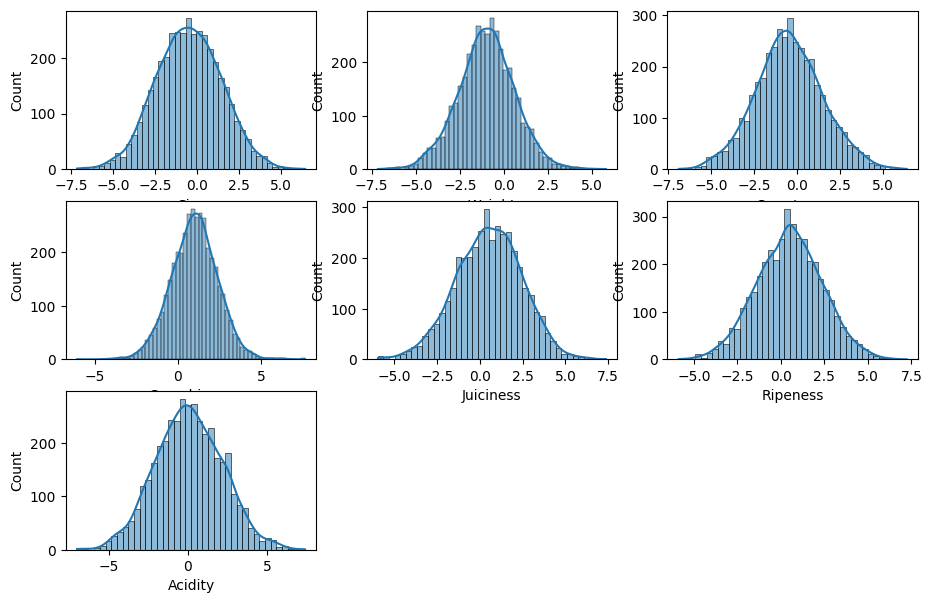

In [ ]:
hist_iter=1
plt.figure(figsize=(11,7))
for i in data.columns[:-1]:
  plt.subplot(3,3,hist_iter)
  sns.histplot(x=data[i],kde=True)
  hist_iter+=1
plt.show()


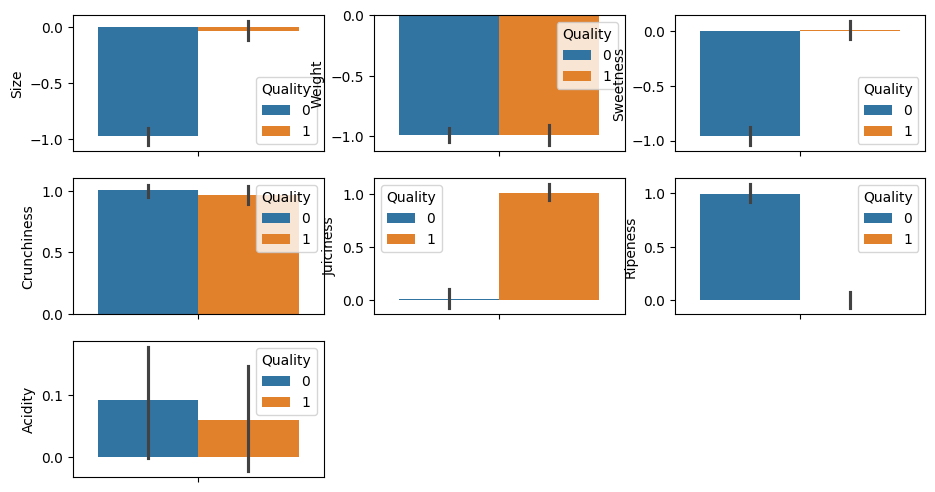

In [ ]:
bar_iter=1
plt.figure(figsize=(11,6))
for i in data.columns[:-1]:
  plt.subplot(3,3,bar_iter)
  sns.barplot(y=data[i],hue=data["Quality"])
  bar_iter+=1
plt.show()


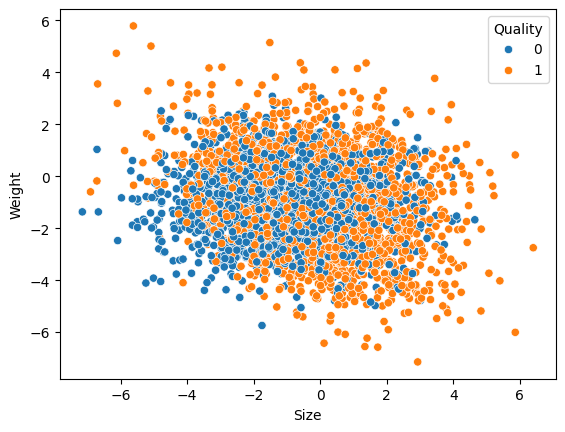

In [ ]:
sns.scatterplot(x=data['Size'],y=data['Weight'],hue=data["Quality"])
plt.show()

<Axes: >

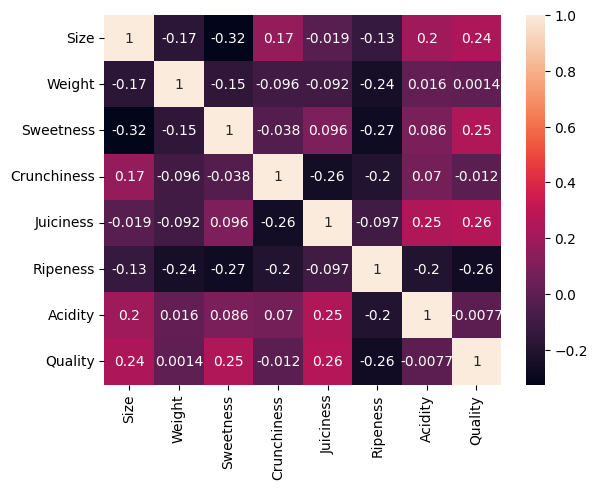

In [ ]:
sns.heatmap(data.corr(),annot=True,fmt=".2g")

In [ ]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.25,random_state=0)

In [ ]:
svc_model=SVC(kernel="poly")
xgb_model=XGBClassifier(n_estimators=100)
rf_model=RandomForestClassifier(n_estimators=100)


In [ ]:
svc_model.fit(x_train,y_train)
xgb_model.fit(x_train,y_train)
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
svc_ypred=svc_model.predict(x_test)
xgb_ypred=xgb_model.predict(x_test)
rf_ypred=rf_model.predict(x_test)

In [ ]:
svc_accuracy_score=accuracy_score(svc_ypred,y_test)
xgb_accuracy_score=accuracy_score(xgb_ypred,y_test)
rf_accuracy_score=accuracy_score(rf_ypred,y_test)

In [ ]:
df=pd.DataFrame({"model":["SVC","XgBclassifier","Random Forest"],"score":[svc_accuracy_score,xgb_accuracy_score,rf_accuracy_score]})

In [ ]:
df

,model,score
0,SVC,0.861
1,XgBclassifier,0.892
2,Random Forest,0.891


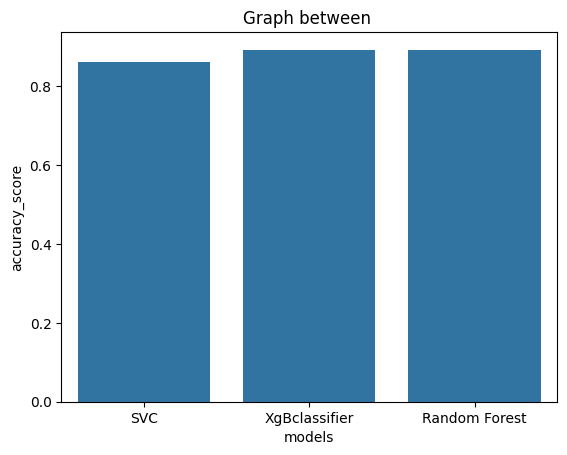

In [ ]:
sns.barplot(x=df["model"],y=df["score"])
plt.title("Graph between ")
plt.xlabel("models")
plt.ylabel("accuracy_score")
plt.show()